In [1]:
!pip install tensorflow_datasets scikit-image sklearn cython

     |████████████████████████████████| 3.1 MB 370 kB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 151 kB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 1.6 MB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 3.3 MB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 4.4 MB 1.5 MB/s eta 0:00:011
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=80832 sha256=c45b10245d225c975a21bced4b13b296f1a02a79f99b6eafed68911d6ae2cd14
  Stored in directory: /tmp/pip-ephem-wheel-cache-axxx8jae/wheels/09/84/74/d2b4feb9ac9488bc83c475cb2cbe8e8b7d9cea8320d32f3787
  Created wheel for future: filename=f

In [2]:
# need to install pycocotools AFTER cython
!pip install pycocotools

     |████████████████████████████████| 1.5 MB 147 kB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.0-cp36-cp36m-linux_x86_64.whl size=275981 sha256=b5d725dafd9182a99e2f91a28a689a292b8510531ad743b91d0d4ca287266645
  Stored in directory: /tmp/pip-ephem-wheel-cache-__1et1rd/wheels/64/7a/c0/ac8f633d11a5f1a6902c72acb9fa828a2bb3639afba4e94a6c
Successfully built pycocotools


In [3]:
!apt-get update && apt-get install -y git
!rm -rf data/cocoapi
!cd data && git clone https://github.com/cocodataset/cocoapi
!cd data/cocoapi/PythonAPI && make -j $(nproc)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [44.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [8213 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [889 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [12.6 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [59.0 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [1183 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/u

../common/maskApi.c: In function ‘rleToBbox’:
../common/maskApi.c:141:31: warning: ‘xp’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       if(j%2==0) xp=x; else if(xp<x) { ys=0; ye=h-1; }
                               ^
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c pycocotools/_mask.c -o build/temp.linux-x86_64-3.6/pycocotools/_mask.o -Wno-cpp -Wno-unused-function -std=c99
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.6/../common/maskApi.o build/temp.lin

In [4]:
# !mkdir -p data

# !cd data && wget http://images.cocodataset.org/zips/train2017.zip
# !cd data && wget http://images.cocodataset.org/zips/val2017.zip
# !cd data && wget http://images.cocodataset.org/zips/test2017.zip
# !cd data && wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [5]:
# %%time
# !cd data && unzip -q train2017.zip

In [6]:
# %%time
# !cd data && unzip -q val2017.zip

In [7]:
# %%time
# !cd data && unzip -q test2017.zip

In [8]:
# %%time
# !cd data && unzip -q annotations_trainval2017.zip

In [9]:
import tensorflow_datasets as tfds
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import skimage.io as io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Average, Convolution2D, MaxPooling2D, Activation, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.nasnet import NASNetMobile

from sklearn.metrics import classification_report
tf.__version__

'2.0.1'

In [10]:
COCO_ROOT = './data'
import sys
sys.path.insert(0, os.path.join(COCO_ROOT, 'cocoapi/PythonAPI'))
from pycocotools.coco import COCO

In [11]:
if tf.__version__.startswith("1."):
    val_acc_name = "val_acc"
    acc_name = "acc"
else:
#     tf.compat.v1.disable_eager_execution()
    val_acc_name = "val_accuracy"
    acc_name = "accuracy"

In [12]:
BATCH_SIZE = 32
IMG_INP_SIZE = 192
# Эпохи большие, поэтому ввел переменную INTERMEDIATE_STEP, чтобы раз 
# в ОБЩЕЕ_КОЛИЧЕСТВО_ПРИМЕРОВ//BATCH_SIZE//INTERMEDIATE_STEP батчей была валидация и отметка в истории
INTERMEDIATE_STEP = 20
EPOCHS = 3

### Подготовка данных

In [13]:
class Dataset():
    
    def crop_images(self, img, inp_size, random_crop=False):
        shape = tf.shape(img)
        pad = (
            [0, tf.maximum(inp_size - shape[0], 0)],
            [0, tf.maximum(inp_size - shape[1], 0)],
            [0, 0],
        )
        img = tf.pad(img, pad)
        
        if random_crop:
            img = tf.image.random_crop(img, (inp_size, inp_size, shape[2]))
        else: #central crop
            shape = tf.shape(img)
            ho = (shape[0] - inp_size) // 2
            wo = (shape[1] - inp_size) // 2
            img = img[ho:ho+inp_size, wo:wo+inp_size, :]
        
        return img
    
    def train_dataset(self, batch_size, epochs, inp_size):
        
        def item_to_images(item):
            random_crop = True
            img_combined = tf.py_function(self.read_images, [item], tf.uint8)
            img_combined = self.crop_images(img_combined, inp_size, random_crop)
            
            img = tf.cast(img_combined[...,:3], tf.float32) / np.float32(255.)
            mask_class = tf.cast(img_combined[...,3:4], tf.float32)
            return img, mask_class
        
        dataset = tf.data.Dataset.from_tensor_slices(self.img_list)
        dataset = dataset.shuffle(buffer_size=len(self.img_list))
#         dataset = dataset.take(BATCH_SIZE*20) # FOR DEBUGGING
        dataset = dataset.map(item_to_images)
        dataset = dataset.repeat(epochs)
        dataset = dataset.batch(batch_size, drop_remainder=True)
        dataset = dataset.prefetch(10)
        
        return dataset
    
    def val_dataset(self, batch_size, inp_size):
        
        def item_to_images(item):
            random_crop = False
            img_combined = tf.py_function(self.read_images, [item], tf.uint8)
            img_combined = self.crop_images(img_combined, inp_size, random_crop)
            
            img = tf.cast(img_combined[...,:3], tf.float32) / np.float32(255.)
            mask_class = tf.cast(img_combined[...,3:4], tf.float32)
            return img, mask_class
        
        dataset = tf.data.Dataset.from_tensor_slices(self.img_list)
        dataset = dataset.shuffle(buffer_size=len(self.img_list))
        dataset = dataset.map(item_to_images)
        dataset = dataset.batch(batch_size, drop_remainder=True)
        dataset = dataset.prefetch(10)
        
        return dataset

In [14]:
class COCO_Dataset(Dataset):
    
    def __init__(self, sublist):
        ann_file_fpath = os.path.join(COCO_ROOT, 'annotations', 'instances_'+sublist+'2017.json')
        self.coco = COCO(ann_file_fpath)
        self.cat_ids = self.coco.getCatIds(catNms=['person'])
        self.img_list = self.coco.getImgIds(catIds=self.cat_ids)
        
    def read_images(self, img_id):
        img_id = int(img_id.numpy())
        img_data = self.coco.loadImgs(img_id)[0]
        img_fname = '/'.join(img_data['coco_url'].split('/')[-2:])
        
        img = io.imread(os.path.join(COCO_ROOT, img_fname))
        if len(img.shape) == 2:
            img = np.tile(img[..., None], (1,1,3))
        
        ann_ids = self.coco.getAnnIds(imgIds=img_data['id'], catIds=self.cat_ids, iscrowd=None)
        anns = self.coco.loadAnns(ann_ids)
        mask_class = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        for i in range(len(anns)):
            mask_class += self.coco.annToMask(anns[i])
        mask_class = (mask_class > 0).astype(np.uint8)
        
        img_combined = np.concatenate([img, mask_class[..., None]], axis=2)
        
        return img_combined

In [15]:
COCO_dataset_train = COCO_Dataset('train')
COCO_dataset_val = COCO_Dataset('val')

loading annotations into memory...
Done (t=17.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [16]:
train_ds = COCO_dataset_train.train_dataset(batch_size=BATCH_SIZE, epochs=EPOCHS, inp_size=IMG_INP_SIZE)
val_ds = COCO_dataset_val.val_dataset(batch_size=BATCH_SIZE, inp_size=IMG_INP_SIZE)

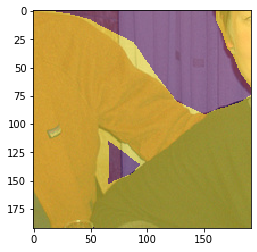

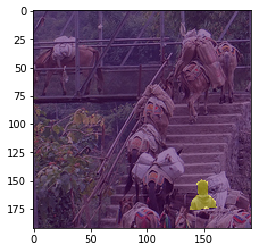

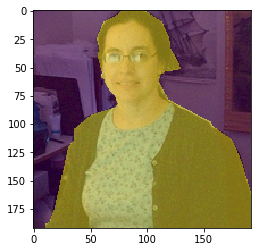

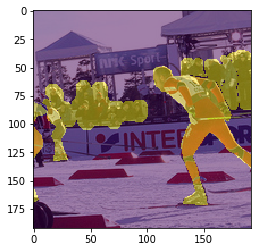

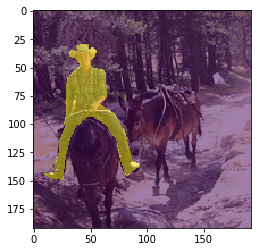

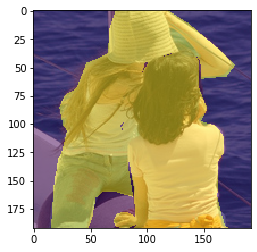

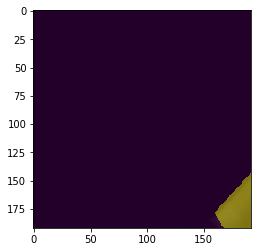

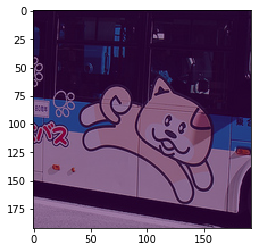

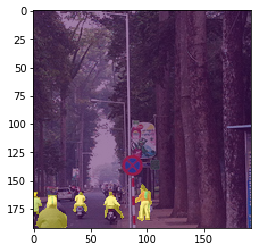

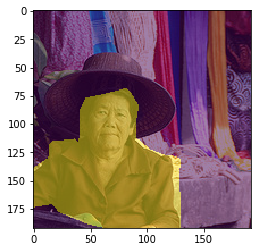

In [17]:
for idx in range(10):
    i = next(iter(val_ds))
    sample = i[0][idx].numpy()
    seg_map = plt.get_cmap('viridis')(i[1][idx].numpy().reshape(IMG_INP_SIZE,IMG_INP_SIZE))[..., :3]
    plt.imshow(sample*0.5 + seg_map*0.5)
    plt.show()

### Проектирование модели

In [18]:
def build_model():
    x = tf.keras.layers.Input((IMG_INP_SIZE, IMG_INP_SIZE, 3))
    
    out = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    out1 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2,2))(out1)
    
    out = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(out)
    out2 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2,2))(out2)
    
    out = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(out)
    out3 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2,2))(out3)
    
    out = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu')(out)
    out4 = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.MaxPool2D((2,2))(out4)
    
    out = tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation='relu')(out)
    
    out = tf.keras.layers.Conv2DTranspose(512, (3,3), strides=(2,2), padding='same', activation='relu')(out)
    out = tf.concat([out4, out], axis=3)
    
    out = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu')(out)
    
    out = tf.keras.layers.Conv2DTranspose(256, (3,3), strides=(2,2), padding='same', activation='relu')(out)
    out = tf.concat([out3, out], axis=3)
    
    out = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu')(out)

    out = tf.keras.layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', activation='relu')(out)
    out = tf.concat([out2, out], axis=3)
    
    out = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(out)
    
    out = tf.keras.layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='relu')(out)
    out = tf.concat([out1, out], axis=3)
    
    out = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(out)
    out = tf.keras.layers.Conv2D(1, (3,3), padding='same', activation='sigmoid')(out)
    
    return tf.keras.Model(inputs=x, outputs=out)

In [19]:
try:
    del model
    K.clear_session()
except:
    pass
model = build_model()

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 192, 192, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 192, 192, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 192, 192, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 96, 96, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

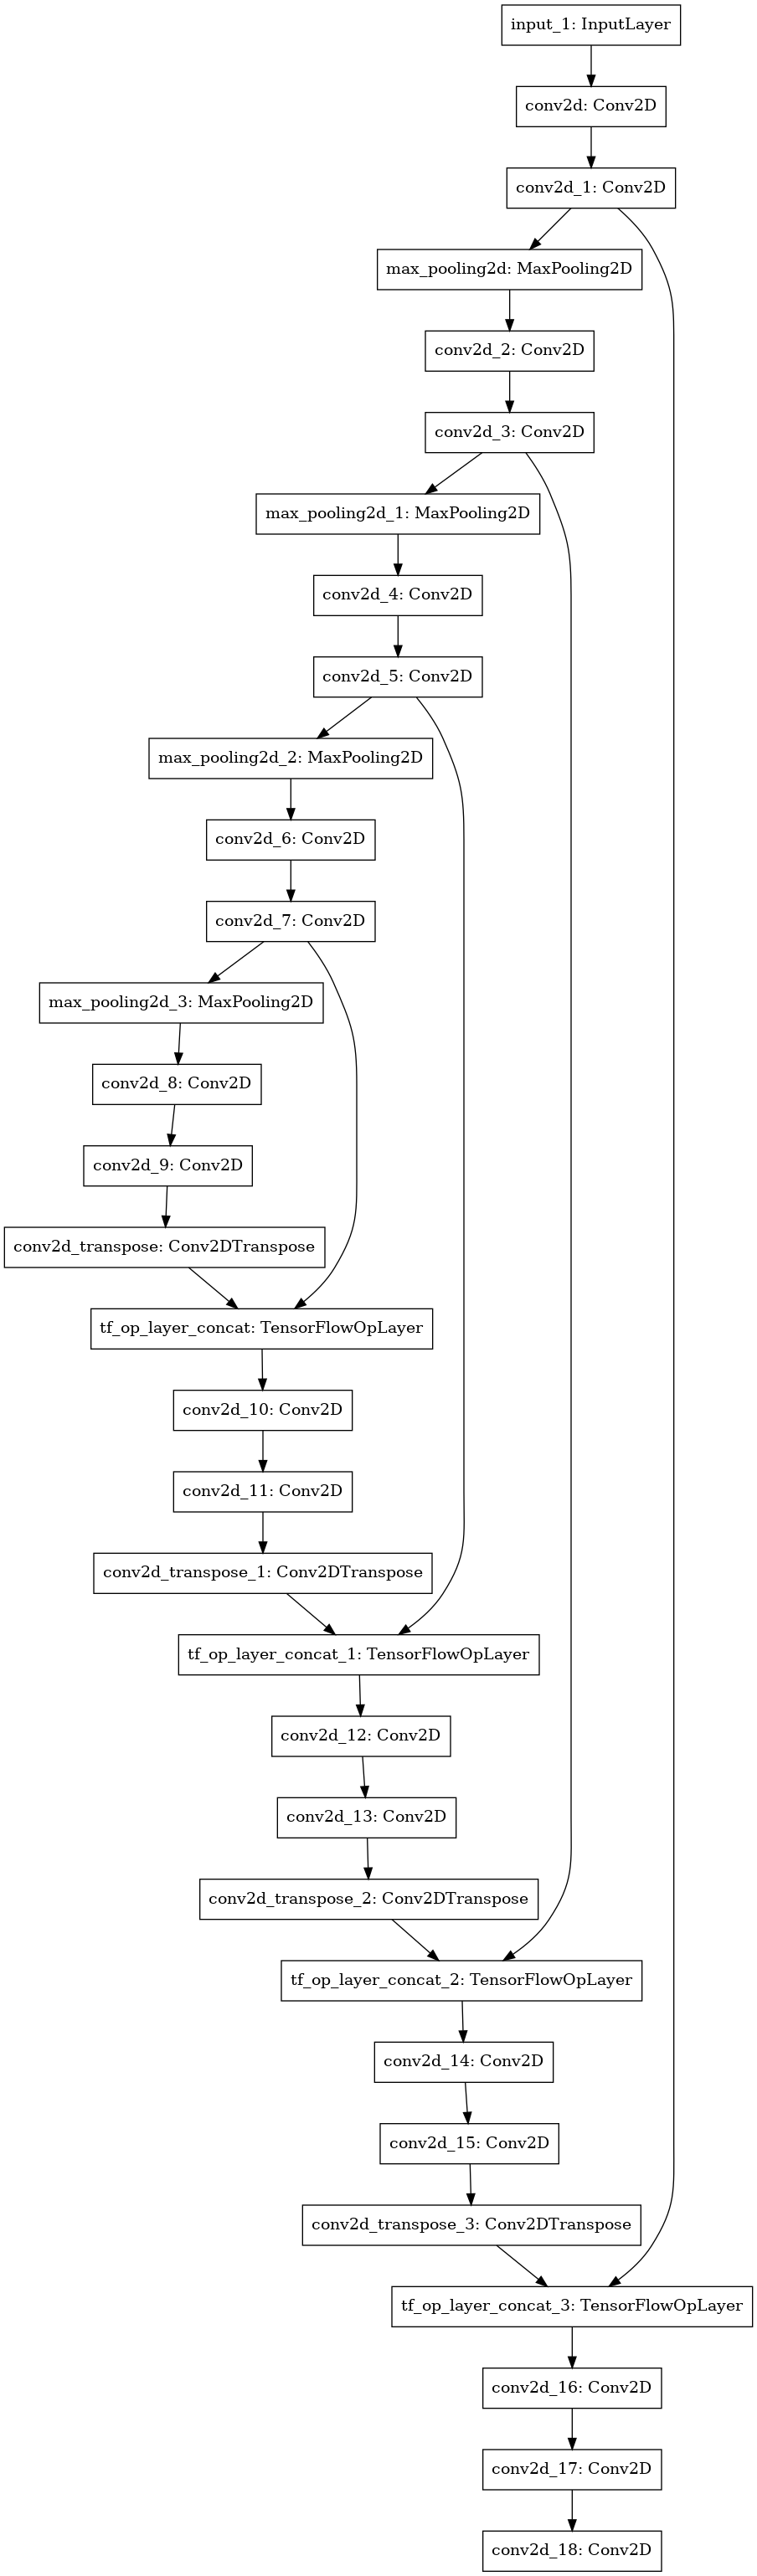

In [21]:
tf.keras.utils.plot_model(model)

### Тренировка модели

In [22]:
loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer="adam", loss=loss)

In [23]:
%%time
# Количество шагов в эпохе поделено на INTERMEDIATE_STEP чтобы валидация и отметки в истории были почаще, по факту 1 
# полная эпоха будет раз в INTERMEDIATE_STEP отмеченных эпох.
# Таким образом модель будет тренирована EPOCHS полных эпох, а отметок будет в INTERMEDIATE_STEP раз больше.
history = model.fit(train_ds, 
                 epochs=EPOCHS * INTERMEDIATE_STEP,
                 steps_per_epoch=len(COCO_dataset_train.img_list)//BATCH_SIZE//INTERMEDIATE_STEP, 
                 validation_data=val_ds, 
                 validation_steps=10)

Train for 100 steps, validate for 10 steps
Epoch 1/60
100/100 [==============================] - 106s 1s/step - loss: 0.5205 - val_loss: 0.5523
Epoch 2/60
100/100 [==============================] - 80s 804ms/step - loss: 0.4913 - val_loss: 0.5625
Epoch 3/60
100/100 [==============================] - 81s 809ms/step - loss: 0.4868 - val_loss: 0.5516
Epoch 4/60
100/100 [==============================] - 81s 806ms/step - loss: 0.4671 - val_loss: 0.5498
Epoch 5/60
100/100 [==============================] - 80s 800ms/step - loss: 0.4664 - val_loss: 0.6212
Epoch 6/60
100/100 [==============================] - 80s 797ms/step - loss: 0.4684 - val_loss: 0.5545
Epoch 7/60
100/100 [==============================] - 80s 804ms/step - loss: 0.4590 - val_loss: 0.5215
Epoch 8/60
100/100 [==============================] - 81s 811ms/step - loss: 0.4572 - val_loss: 0.5052
Epoch 9/60
100/100 [==============================] - 80s 802ms/step - loss: 0.4498 - val_loss: 0.5277
Epoch 10/60
100/100 [===========

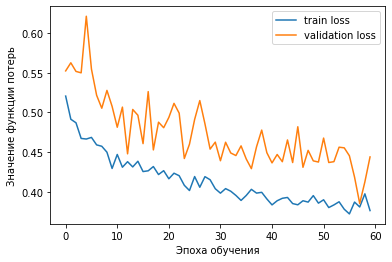

In [24]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.legend()
plt.show()

### Предсказание с помощью модели

In [25]:
test_batch = next(iter(val_ds))

In [26]:
prediction = model.predict(test_batch)

In [27]:
prediction.shape

(32, 192, 192, 1)

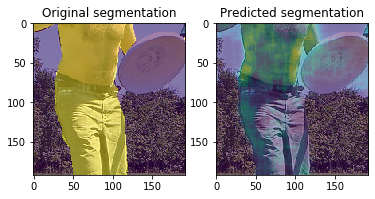

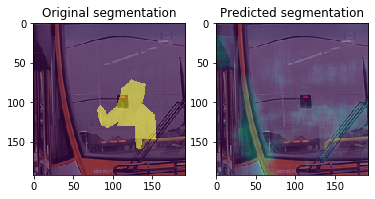

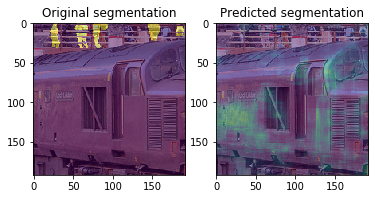

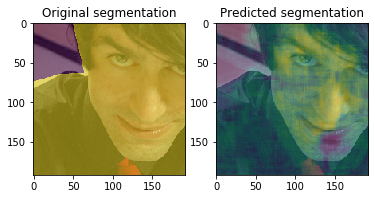

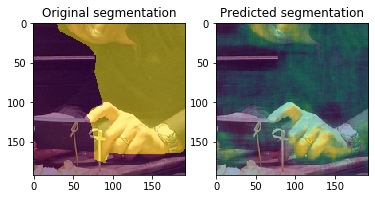

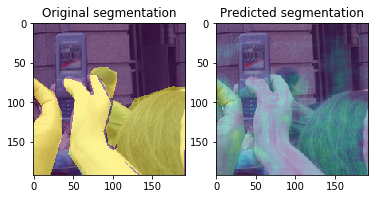

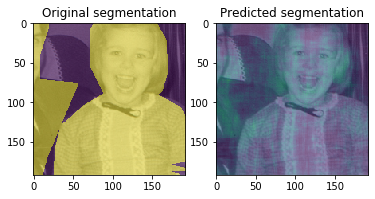

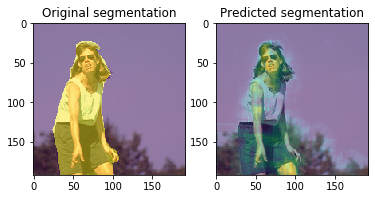

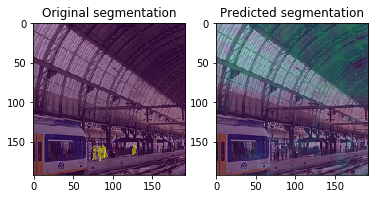

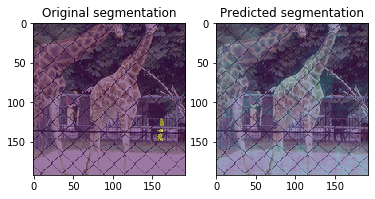

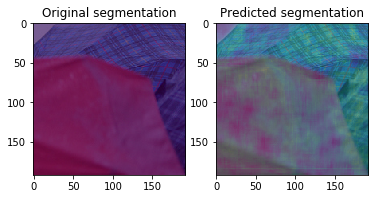

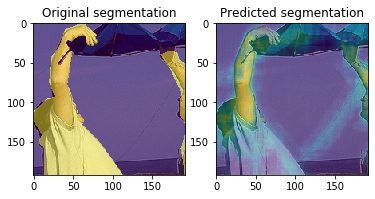

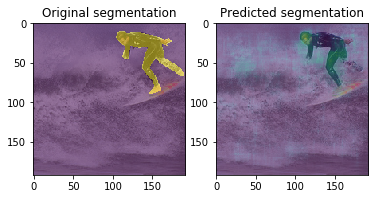

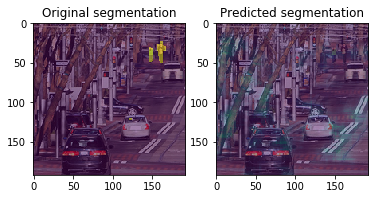

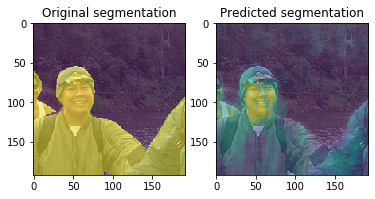

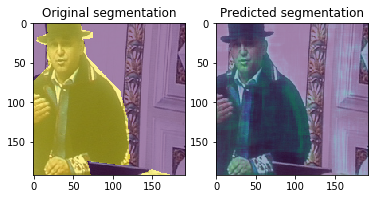

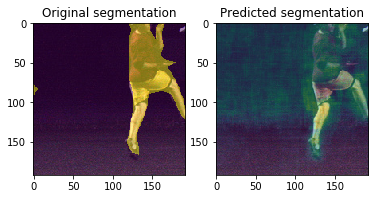

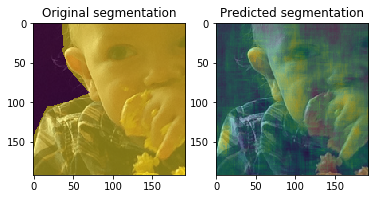

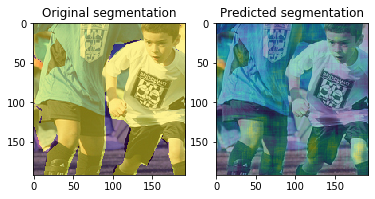

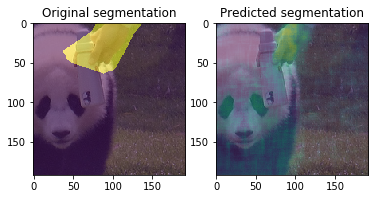

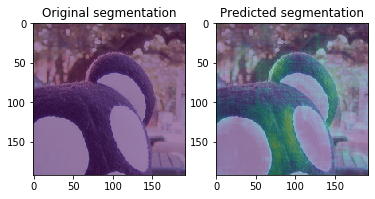

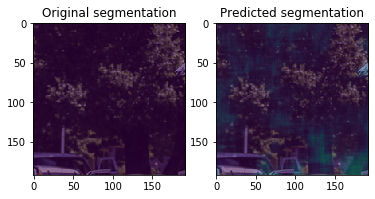

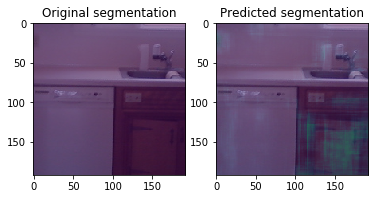

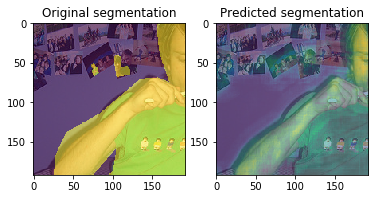

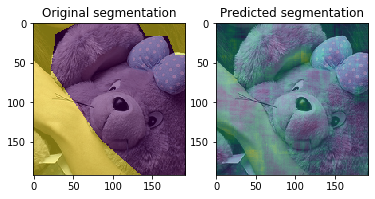

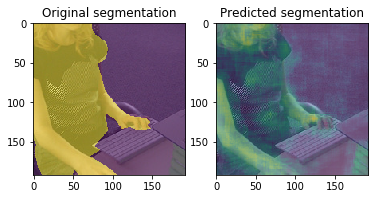

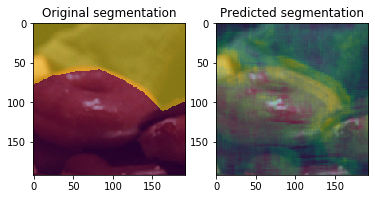

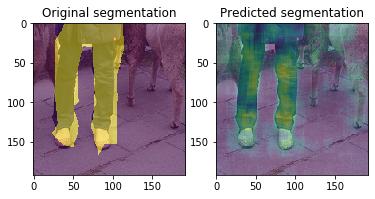

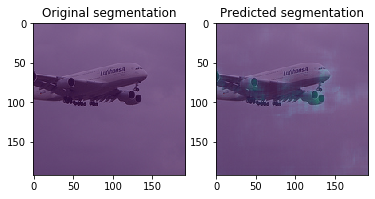

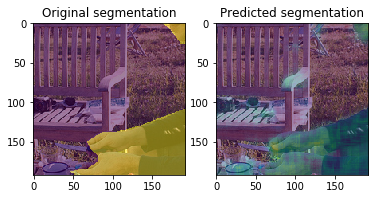

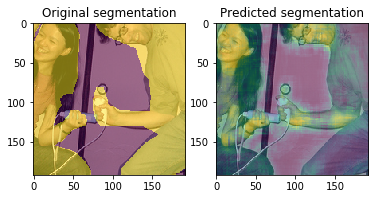

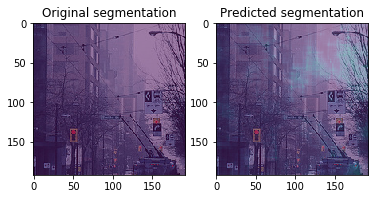

In [28]:
for idx in range(len(prediction)):
    sample = test_batch[0][idx].numpy()
    
    fig = plt.figure()
    
    plt.subplot(1,2,1)
    plt.title("Original segmentation")
    actual_seg_map = plt.get_cmap('viridis')(test_batch[1][idx].numpy().reshape(IMG_INP_SIZE,IMG_INP_SIZE))[..., :3]
    plt.imshow(sample*0.5 + actual_seg_map*0.5)
    
    plt.subplot(1,2,2)
    plt.title("Predicted segmentation")
    actual_seg_map = plt.get_cmap('viridis')(prediction[idx].reshape(IMG_INP_SIZE,IMG_INP_SIZE))[..., :3]
    plt.imshow(sample*0.5 + actual_seg_map*0.5)
    
    plt.show()

### Понемногу сеть обучается, но нужно дольше обучать, чтобы понять достигнут предел точности или нет.